<a href="https://colab.research.google.com/github/iceman67/-Python/blob/master/LINC_Pandas_Example_2021_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pandas** 설치하기 
> pip install pandas

Pandas 는 정형화된 데이터를 다루기에 적합하다

Pandas에서 제공하는 2개의 자료구조인 시리즈(Series)과 데이터프레임(DataFrame)을 이해한다

* Series는 엑셀에서 한개 열(column)과 같는 1차원 리스트와 같은 구조임 

In [ ]:
import pandas as pd # pandas 패키지를 pd라는 이름으로 사용한다

#### 시리즈 만들기
* 리스트로 만들기
* 딕셔너리로 만들기
* 튜플로 만들기

In [ ]:
list_data = ['Dog', 'Cat', 'Tiger']
idx = ['0', '1', '2']
series = pd.Series(list_data, index=idx)

In [ ]:
series

0      Dog
1      Cat
2    Tiger
dtype: object

In [ ]:
dict_data = { 'a': 1, 'b':2, "c":3}
series  = pd.Series(dict_data)

In [ ]:
type(series)

pandas.core.series.Series

In [ ]:
series

a    1
b    2
c    3
dtype: int64

In [ ]:
series.index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
series.values

array([1, 2, 3])

In [ ]:
series = pd.Series([1, 1, 3, 4, 5])
# 왼쪽에는 Series의 인덱스(index)를, 오른쪽은 값(value)를 제공한다
series

0    1
1    1
2    3
3    4
4    5
dtype: int64

In [ ]:
# values는 값을 출력함
series.values

array([1, 1, 3, 4, 5])

In [ ]:
# Index를 출력함
series.index

RangeIndex(start=0, stop=5, step=1)

 특정값의 개수를 출력한다(빈도수를 얻기 위해 사용함)

In [ ]:
series.value_counts()

1    2
5    1
4    1
3    1
dtype: int64

Series 에서 특정값을 접근함 

In [ ]:
# [  ] 안에 조건식을 사용할 수 이다
series[series > 2]

2    3
3    4
4    5
dtype: int64

In [ ]:
# 인덱스를 이용해 값을 제거할수도 있다
series = series.drop(0)
series

1    1
2    3
3    4
4    5
dtype: int64

In [ ]:
# append 함수를 이용하여 값을 추가할수도 있어요. 이때 값은 Series 형태의 값만 추가가 가능합니다
series = series.append(pd.Series([6, 7]))
series

1    1
2    3
3    4
4    5
0    6
1    7
dtype: int64

In [ ]:
# 값을 추가하니 인덱스 조정이 필요하며  reindex 함수를 통해 재정의할 수 있다
series = series.reset_index(drop=True)
series

0    1
1    3
2    4
3    5
4    6
5    7
dtype: int64

In [ ]:
series[1]=100

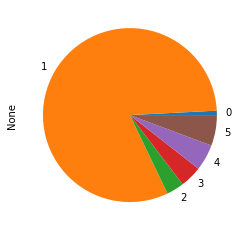

In [ ]:
import matplotlib.pyplot as plt
series.plot(kind='pie')
plt.show()

* Series가 엑셀에서 한개 줄을 말한다면 DataFrame은 표 형태의 값이며, 
> Series가 여러개 모이면 Dataframe이 구성됨 

In [ ]:
# DataFrame은 마치 사전과 같은 형태로 초기화한다
dataframe = pd.DataFrame({'힘':[1, 2, 3], '지력':[-2 ,3 ,4], '마력': [2, 1, 0]})
dataframe

,힘,지력,마력
0,1,-2,2
1,2,3,1
2,3,4,0


In [ ]:
df = dataframe.set_index('힘').min()
df

지력   -2
마력    0
dtype: int64

In [ ]:
# 데이터프레임을 슬라이싱함 
dataframe[:2]

,힘,지력,마력
0,1,-2,2
1,2,3,1


In [ ]:
# 인덱스 0과 2의 행을 얻어옴
dataframe.loc[[0,2]]

,힘,지력,마력
0,1,-2,2
2,3,4,0


In [ ]:
dataframe.loc[[0,2], ['힘']]

,힘
0,1
2,3


In [ ]:
# axis를 0으로 설정하면 특정행(row)를 제거할 수 있다.
dataframe.drop(0, axis=0)

,힘,지력,마력
1,2,3,1
2,3,4,0


In [ ]:
# axis를 1으로 설정하면 열(column)를 제거할 수 있다
dataframe.drop("마력", axis=1)

,힘,지력
0,1,-2
1,2,3
2,3,4


#### titanic 데이터셋 다루기
데이터셋(dataset) 의 자료를 읽어 분석을 수행한다.
> 자료 https://www.kaggle.com/c/titanic

* 데이터분석을 통해 데이터가 갖는 특성을 파악함
* 분석을 통해 예측모델 개발에 활용할 수 있음

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/iceman67/DataAnalysis/master/train.csv'

In [ ]:
titanic_df = pd.read_csv(url)

#### 데이터 보기

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_df.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
titanic_df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [ ]:
titanic_df.values[0]

array([1, 0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0,
       'A/5 21171', 7.25, nan, 'S'], dtype=object)

In [ ]:
titanic_df.iloc[-5:-1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


In [ ]:
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
titanic_df.sort_values(by=['Fare'], axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [ ]:
titanic_df.sort_values(by=['Fare'], axis=0, ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [ ]:
titanic_df.sort_index(axis=1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0,211536
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1,112053
888,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0,W./C. 6607
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1,111369


#### 결측치 다루기
* 891 개 행 중 나이(Age)에 177개의 결측치, 객실번호(Cabin)에 687개 결측치, 탑승항구(Embarked)에 2개의 결측치가 있음
* 결측치 확인, 결측치 대체/제거를 통해 데이터 클린징 수행

In [ ]:
titanic_df.count() # 데이터 개수 확인

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
titanic_df.isnull().sum() # 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치 제거

In [ ]:
titanic_df = titanic_df.dropna(thresh=int(len(titanic_df)*0.5), axis =1)

In [ ]:
titanic_df.isnull().sum() # 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Age결측치를 중간값으로 보정함

In [ ]:
titanic_df['Age'].median()
# mean() 을 사용 평균값으로 대치할 수 있음

28.0

In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Embarked 을 최다빈도 값으로 대치

In [ ]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

(**실습**)데이터프레임의 처음 7개 행을 얻어온다

In [ ]:
titanic_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S


In [ ]:
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Sibsp 형재자매/배우자 수
# Parch 부모/자녀 수
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

(**실습**) 열이름 Embarked 의 자료값의 의미를 설명하시오

In [ ]:
titanic_df.shape

(891, 11)

In [ ]:
# 데이터에 대한 기본정보 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


describe()를 사용하여 전체 승객의 생존율은 구해본다

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [ ]:
titanic_df['Age'].max()

80.0

승객 ID 인 PassengerID 를 인텍스로 지정하여 자료를 읽어 데이터프레임을 구성한다

In [ ]:
titanic_df = pd.read_csv(url, index_col='PassengerId')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
value_counts = titanic_df['Pclass'].value_counts()

인덱싱을 통해 시리즈(Series)로 추출함

In [ ]:
print(type(value_counts))

<class 'pandas.core.series.Series'>


1등, 2등, 3등석 승객수
print(value_counts)

Embarked (승선지)

In [ ]:
titanic_df[["Embarked", "Sex"]].nunique()

Embarked    3
Sex         2
dtype: int64

In [ ]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_df["Embarked"] = titanic_df["Embarked"].astype("category")
titanic_df["Embarked"].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

In [ ]:
# 새로 생성된 'Age_0' 열의 모든 값은 0 으로 채워진다
titanic_df['Age_0'] = 0

In [ ]:
titanic_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


전체 샘플수 891중 생존재는 342명이고 사망자는 549명이다

In [ ]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

남자승객의 생존율은 18.9%, 여자승객의 생존율은  74.2 % 임을 확인할 수 있다

In [ ]:
titanic_df['Survived'][titanic_df['Sex'] == 'male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [ ]:
titanic_df['Survived'][titanic_df['Sex'] == 'female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived (Female)')

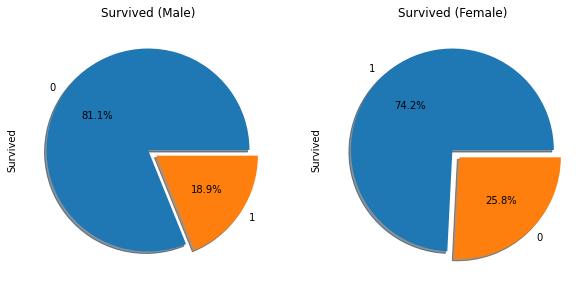

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,2, figsize= (10,5)) 
titanic_df['Survived'][titanic_df['Sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
titanic_df['Survived'][titanic_df['Sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')



객실 등급별 생존자수를 seaborn 패키지를 사용하여 차트로  출력하기
* countplot() 함수를 사용한다
> 객실 등급 카테고리별 생존자수를 계산해 차트로 나타낸다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


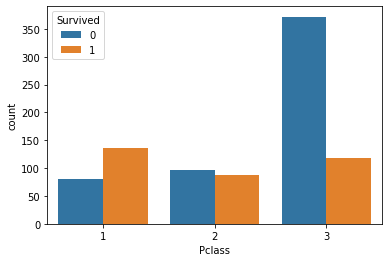

In [ ]:
import seaborn as sns
sns.countplot('Pclass', hue='Survived', data=titanic_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


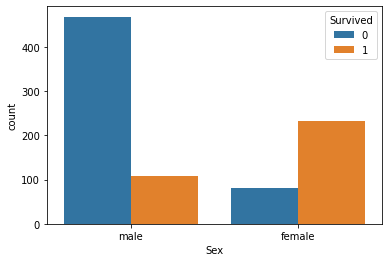

In [ ]:
 sns.countplot('Sex',  hue='Survived', data=titanic_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


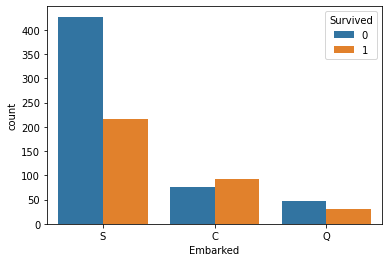

In [ ]:
sns.countplot('Embarked',  hue='Survived', data=titanic_df)

In [ ]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1)

In [ ]:
titanic_drop_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df = pd.read_csv(url)

In [ ]:
indexes = titanic_df.index

In [ ]:
print (indexes)

RangeIndex(start=0, stop=891, step=1)


In [ ]:
indexes.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
indexes[:5].values

array([0, 1, 2, 3, 4])

In [ ]:
titanic_sorted = titanic_df.sort_values(by = ['Name'])

In [ ]:
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [ ]:
titanic_sorted = titanic_df.sort_values(by = ['Pclass','Name'])

In [ ]:
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [ ]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

특정 컬럼의 자료값의 특징을 이해한다

In [ ]:
titanic_df[ ['Age', 'Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

In [ ]:
titanic_df[ ['Age', 'Fare']].max()

Age      80.0000
Fare    512.3292
dtype: float64

In [ ]:
titanic_df[ ['Age', 'Fare']].min()

Age     0.42
Fare    0.00
dtype: float64

자료값의 내용을 추출하여 새로운 컬럼을 생성한다

In [ ]:
titanic_df['Embarked(Humanized)'] = titanic_df['Embarked'].replace('C', 'Cherbourg').replace('S', 'Southhampton').replace('Q', 'Queenstown')

In [ ]:
titanic_df.iloc[1:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked(Humanized)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southhampton


In [ ]:
titanic_df.loc[1:3, ['Name', 'Sex']]

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female


#### groupby() 
특정열에 대해 그룹객체를 생성한 후, 자료를  집계하기 위해 사용

In [ ]:
class_group = titanic_df.groupby('Pclass')

In [ ]:
class_group.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

Pclass열에 대해 그룹객체를 생성한 후, 평균(mean)으로 집계

In [ ]:
titanic_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Pclass, Sex열에 대해 그룹객체를 생성한 후, 평균(mean)으로 집계

In [ ]:
class_and_gender_group = titanic_df.groupby(['Pclass', 'Sex'])

In [ ]:
class_and_gender_group.groups

{(1, 'female'): [1, 3, 11, 31, 52, 61, 88, 136, 151, 166, 177, 194, 195, 215, 218, 230, 256, 257, 258, 268, 269, 275, 290, 291, 297, 299, 306, 307, 309, 310, 311, 318, 319, 325, 329, 334, 337, 341, 356, 366, 369, 375, 380, 383, 393, 412, 435, 457, 486, 496, 498, 504, 513, 520, 523, 537, 539, 540, 556, 558, 571, 577, 581, 585, 591, 609, 627, 641, 669, 689, 700, 708, 710, 716, 730, 742, 759, 763, 765, 779, 781, 796, 809, 820, 829, 835, 842, 849, 853, 856, 862, 871, 879, 887], (1, 'male'): [6, 23, 27, 30, 34, 35, 54, 55, 62, 64, 83, 92, 96, 97, 102, 110, 118, 124, 137, 139, 155, 168, 170, 174, 185, 187, 209, 224, 245, 248, 252, 262, 263, 270, 273, 284, 295, 298, 305, 331, 332, 336, 339, 351, 370, 373, 377, 390, 430, 434, 438, 445, 447, 449, 452, 453, 456, 460, 462, 467, 475, 484, 487, 492, 493, 505, 507, 512, 515, 527, 536, 544, 545, 550, 555, 557, 572, 583, 587, 599, 602, 604, 607, 621, 625, 630, 632, 633, 645, 647, 659, 660, 662, 671, 679, 681, 690, 694, 698, 701, ...], (2, 'female'): [

In [ ]:
titanic_df.groupby(['Pclass', 'Sex'], as_index=False).mean()

,Pclass,Sex,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,female,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798
1,1,male,455.729508,0.368852,41.281386,0.311475,0.278689,67.226127
2,2,female,443.105263,0.921053,28.722973,0.486842,0.605263,21.970121
3,2,male,447.962963,0.157407,30.740707,0.342593,0.222222,19.741782
4,3,female,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810
5,3,male,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633


In [ ]:
titanic_df.groupby(['Pclass', 'Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                                     
1      female   469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       male     455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       male     447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   16.118810
       male     455.515850  0.135447  26.507589  0.498559  0.224784   12.661633

Pclass, Sex열에 대해 그룹객체를 생성한 후, Age 열 평균(mean)으로 집계

In [ ]:
part_df = titanic_df[['Pclass', 'Sex', 'Age']]
part_df.groupby(['Pclass', 'Sex']).mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [ ]:
part_df.groupby(['Pclass', 'Sex'], as_index=False).max()

,Pclass,Sex,Age
0,1,female,63.0
1,1,male,80.0
2,2,female,57.0
3,2,male,70.0
4,3,female,63.0
5,3,male,74.0


In [ ]:
part_df = titanic_df[['Pclass', 'Sex', 'Survived']]
part_df.groupby(['Pclass', 'Sex'], as_index=False).mean()

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [ ]:
titanic_df.set_index(['Pclass', 'Sex'])

,,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked(Humanized)
Pclass,Sex,,,,,,,,,,,
3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Southhampton
1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southhampton
1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Southhampton
3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Southhampton
...,...,...,...,...,...,...,...,...,...,...,...,...
2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,Southhampton
1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,Southhampton
3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,Southhampton


In [ ]:
titanic_df.set_index(['Pclass', 'Sex']).reset_index()

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked(Humanized)
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Southhampton
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southhampton
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Southhampton
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Southhampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,Southhampton
887,1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,Southhampton
888,3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,Southhampton
889,1,male,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,Cherbourg


In [ ]:
pclass_and_sex_group = titanic_df.set_index(['Pclass', 'Sex']).groupby(level=[0,1])

In [ ]:
pclass_and_sex_group.mean()

PassengerId  Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                                     
1      female   469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       male     455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       male     447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   16.118810
       male     455.515850  0.135447  26.507589  0.498559  0.224784   12.661633

In [ ]:
pclass_and_sex_group = titanic_df.set_index(['Pclass', 'Sex']).groupby(level=[1,0])
pclass_and_sex_group.mean()

PassengerId  Survived        Age     SibSp     Parch        Fare
Sex    Pclass                                                                  
female 1        469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       2        443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       3        399.729167  0.500000  21.750000  0.895833  0.798611   16.118810
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
       2        447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
       3        455.515850  0.135447  26.507589  0.498559  0.224784   12.661633

In [ ]:
import numpy as np
pclass_and_sex_group = titanic_df.set_index(['Pclass', 'Sex']).groupby(level=[0,1])
pclass_and_sex_group.agg([np.mean, np.sum, np.max])

PassengerId               ...        Fare                     
                     mean     sum amax  ...        mean        sum      amax
Pclass Sex                              ...                                 
1      female  469.212766   44106  888  ...  106.125798  9975.8250  512.3292
       male    455.729508   55599  890  ...   67.226127  8201.5875  512.3292
2      female  443.105263   33676  881  ...   21.970121  1669.7292   65.0000
       male    447.962963   48380  887  ...   19.741782  2132.1125   73.5000
3      female  399.729167   57561  889  ...   16.118810  2321.1086   69.5500
       male    455.515850  158064  891  ...   12.661633  4393.5865   69.5500

[6 rows x 18 columns]

pandas 를 사용하여   좌석별 등급(1,2,3등석)을 기준으로 생존율을 구하고자한다
> df.groupby(['Pclass', 'Survived']).mean()


* 사망자의 나이는 생존자의 나이보다 많다
(생존율과 나이는 상관관계가 있음)

* 1등석의 경우 생존자의 객실가격이 높습니다. (여성 생존율이 높음)

* 가족과 동반탑승한 사람의 생존율이 높았다. (여성 생존율이 높음)

In [ ]:
 titanic_df.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  43.695312  0.287500  0.300000  64.684008
       1          491.772059  35.368197  0.492647  0.389706  95.608029
2      0          452.123711  33.544444  0.319588  0.144330  19.412328
       1          439.080460  25.901566  0.494253  0.643678  22.055700
3      0          453.580645  26.555556  0.672043  0.384409  13.669364
       1          394.058824  20.646118  0.436975  0.420168  13.694887

#### pivot 테이블

* Pclass열의 3가지 그룹, 열에는 Sex열의 2가지그룹, 값에는 Age열을 평균값(mean)으로 집계

In [ ]:
df2 = pd.pivot_table(titanic_df,                # 피벗할 데이터프레임
                     index = 'Pclass',    # 행 위치에 들어갈 열
                     columns = 'Sex',    # 열 위치에 들어갈 열
                     values = 'Age',     # 데이터로 사용할 열
                     aggfunc = ['mean'])   # 데이터 집계함수

In [ ]:
df2

mean           
Sex        female       male
Pclass                      
1       34.611765  41.281386
2       28.722973  30.740707
3       21.750000  26.507589

행에는 Pclass열의 3가지 그룹, 열에는 Sex열의 2가지그룹, 값에는 Survived열을 평균값(mean)과 합(sum)으로 집계한 값이 들어간 것을 확인할 수 있다.

In [ ]:
df2 = pd.pivot_table(titanic_df,                # 피벗할 데이터프레임
                     index = 'Pclass',    # 행 위치에 들어갈 열
                     columns = 'Sex',    # 열 위치에 들어갈 열
                     values = 'Survived',     # 데이터로 사용할 열
                     aggfunc = ['mean', 'sum'])   # 데이터 집계함수

In [ ]:
df2

mean              sum     
Sex       female      male female male
Pclass                                
1       0.968085  0.368852     91   45
2       0.921053  0.157407     70   17
3       0.500000  0.135447     72   47

In [ ]:
pdf3 = pd.pivot_table(titanic_df,
                     index = ['Pclass','Sex'],
                     columns = 'Survived',
                     values = ['Age','Fare'],
                     aggfunc = ['mean','max'])
pdf3

mean                         ...   max                  
                     Age                   Fare  ...   Age    Fare          
Survived               0          1           0  ...     1       0         1
Pclass Sex                                       ...                        
1      female  25.666667  34.939024  110.604167  ...  63.0  151.55  512.3292
       male    44.581967  36.248000   62.894910  ...  80.0  263.00  512.3292
2      female  36.000000  28.080882   18.250000  ...  55.0   26.00   65.0000
       male    33.369048  16.022000   19.488965  ...  62.0   73.50   39.0000
3      female  23.818182  19.329787   19.773093  ...  63.0   69.55   31.3875
       male    27.255814  22.274211   12.204469  ...  45.0   69.55   56.4958

[6 rows x 8 columns]